# Clase!

## Contenidos:
* [Groupby](#groupby)
* [Merge](#merge)
* [Melt](#melt)
* [Sanity-Check](#sc)
## Motivación:
Manipular datos con pandas es sencillo, hacer agrupaciones, cruces y reformatos se logra de manera intuitiva. A continuación veremos un par de ejemplos de como hacer estas acciones.

OBS: Al contrario de NumPy, Pandas esta orientado a los datos (no a los algoritmos/calculos), por eso, las estructuras de datos que usan son distintas:
 * Numpy: Usan array, lo que es equivalente a una matriz, su tamaño no es mutable y el tipo de data (*dtype*) debería ser única dentro del arreglo.
 * Pandas: Usan Series y DataFrame (*a Series of Series*), estos pueden modificar su tamaño y pueden contener cualquier tipo de datos

Primero, Importamos las librerías correspondientes

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

Estos son los alias estandar para estas librerías

In [2]:
%matplotlib inline
#permite que los gráficos se muestren en el notebook

### Groupby: <a id = "groupby"></a>
Esta operación permite agrupar registros basados en distintas operaciones:
 1. Conteo (*.count()*, *size()* )
 2. Suma (*.sum()* )
 3. Media (*.mean()* )
 4. Desviación estandar (*.str()* (dentro de cada grupo))
 5. Custom (revisar [documentación de los objetos DataFramegroupby y aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html))

Ahora generemos los datos:

In [3]:
n=1000 #cantidad de registros
edad = (np.random.randint(low=18,high=80,size=n)) #TIP: presione shift+tab dentro de una funcion para ver su *signature*
inc = np.random.normal(400e3,5e3,size=n)
reg = (np.random.randint(low=0,high=13,size=n))

In [4]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos

Agreguemos alguna interacción para que no sea tan fome...

In [5]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos
df.income = ((df.edad.values-55)*4)**2 + df.income.values - df.region*1e4
display(df.head(5)) # primeros 5 registros
display(df.tail(5)) # últimos 5 registros

,edad,income,region
0,45,342118.701085,6
1,35,309511.792802,10
2,47,286482.611363,11
3,72,402550.257972,0
4,18,384903.620559,4


,edad,income,region
995,44,292686.962385,11
996,71,375243.905812,3
997,69,304612.183815,10
998,73,280222.907847,12
999,24,313764.254899,11


In [6]:
def rango(edad): # TIP: Cualquier función que tenga un Docstring, se puede verificar con shift+tab 
    '''Calcula en que rango de edad cae un registro, toma un float.
    Retorna: str
    ''' # <--- este es el Docstring
    if edad<35:
        return 'joven'
    elif edad<55:
        return 'menos joven'
    else:
        return 'mayor'
    

Aplica la funcion rango a toda la columna edad y se la asigna a la columna *rango edad*

In [7]:
df['rango edad'] = df.edad.apply(rango) 
df.head(10)

,edad,income,region,rango edad
0,45,342118.701085,6,menos joven
1,35,309511.792802,10,menos joven
2,47,286482.611363,11,menos joven
3,72,402550.257972,0,mayor
4,18,384903.620559,4,joven
5,30,309711.460707,10,joven
6,64,354388.489167,5,mayor
7,69,305346.949254,10,mayor
8,53,397345.544042,1,menos joven
9,59,315118.920983,9,mayor


Agrupemos el income por rango de edad, primero contemos cuantos registros hay en cada clase

In [8]:
df[['rango edad','income']].groupby('rango edad')

In [9]:
display(df[['rango edad','income']].groupby('rango edad').count())

,income
rango edad,
joven,262
mayor,421
menos joven,317


veamos ahora el promedio y la desviación estandar por cada grupo

In [10]:
display(df[['rango edad','income']].groupby('rango edad').mean())
display(df[['rango edad','income']].groupby('rango edad').std())

,income
rango edad,
joven,352096.258082
mayor,340155.538425
menos joven,347752.950432


,income
rango edad,
joven,37632.530139
mayor,38123.874643
menos joven,37953.886488


In [11]:
df[['rango edad','region','income']].groupby(['rango edad','region']).mean()

income
rango edad  region               
joven       0       414345.648702
            1       398789.575666
            2       393377.339643
            3       385355.447088
            4       373730.969275
            5       364980.212882
            6       356089.358351
            7       341019.859794
            8       336251.835054
            9       322787.660250
            10      310790.256718
            11      304066.365203
            12      294442.663451
mayor       0       402104.629370
            1       393453.871114
            2       382638.095740
            3       373867.084558
            4       362795.526375
            5       353733.589673
            6       342639.724466
            7       333567.051246
            8       323704.440479
            9       313865.740749
            10      303026.300410
            11      291913.415730
            12      283397.025681
menos joven 0       401247.738257
            1       394338.270612
            2       381074.498847
            3       373617.329431
            4       361421.177104
            5       352801.010645
            6       341440.701759
            7       332667.685761
            8       323686.643711
            9       312449.301446
            10      300818.539757
            11      294103.876236
            12      283149.363947

In [12]:
grouped = df[['rango edad','region','income']].groupby(['rango edad','region']).std()
grouped


income
rango edad  region             
joven       0       5566.080369
            1       5264.108639
            2       6883.805845
            3       7883.424523
            4       5948.514467
            5       7048.826327
            6       7397.417521
            7       7895.844837
            8       7759.141667
            9       7610.959100
            10      7077.692299
            11      8576.175670
            12      5256.323481
mayor       0       4899.889270
            1       7612.750439
            2       6631.149544
            3       5453.529028
            4       4786.776267
            5       4398.423187
            6       5283.397020
            7       5555.109519
            8       6464.322544
            9       4265.007344
            10      6212.045233
            11      6962.634590
            12      6220.130186
menos joven 0       6356.050397
            1       5775.603897
            2       5549.411225
            3       4937.960209
            4       5269.020202
            5       5026.936366
            6       6330.295681
            7       5451.444405
            8       5121.247175
            9       7893.119908
            10      7041.704928
            11      5014.914026
            12      4957.532793

In [13]:
grouped.loc['menos joven',0]

income    6356.050397
Name: (menos joven, 0), dtype: float64

In [14]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].describe()

,edad,income
count,23.000000,23.000000
mean,40.086957,383489.138077
std,5.845846,4582.316693
min,32.000000,374227.955166
25%,35.500000,380330.242698
50%,40.000000,384575.508667
75%,45.000000,386041.876677
max,49.000000,390717.813162


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd444a14a20>,
      dtype=object)

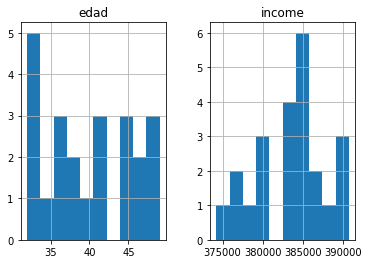

In [15]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].hist()

### Merge <a id='merge'> </a>
Merge es la operación equivalente a los *join* en *SQL*, nos permite juntar dos dataframes basado en los valores de una columna.

Notemos que existen distintas maneras de hacer eso:
 * Inner.
 * Outer.
 
Para más detalles estudie la documentación en este [link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Ahora definamos un poco de metadata para pegarselo a nuestro dataframe original

In [16]:
df_meta = pd.DataFrame({'grupo etario':['menor de edad','joven','menos joven','mayor'],
                        'clasificacion':[0,1,2,3],
                        'ingreso_promedio':[352000, 343000, 347000,np.nan]
                       })
df_meta

,clasificacion,grupo etario,ingreso_promedio
0,0,menor de edad,352000.0
1,1,joven,343000.0
2,2,menos joven,347000.0
3,3,mayor,NaN


Juntemos nuestro dataframe anterior con esta nueva información que tenemos...

In [17]:
merged = pd.merge(df,df_meta, # df es el left (izquierda de la coma) df_meta es el right (derecha de la coma)
                  left_on='rango edad', # nombre de la llave en el dataframe de la izquierda
                  right_on='grupo etario', # nombre de la llave en el dataframe de la izquierda
                  how='inner',
                  indicator=True # agrega una columna _merge, que dice que registros estaban en que dataframe
                 )
merged.head()

,edad,income,region,rango edad,clasificacion,grupo etario,ingreso_promedio,_merge
0,45,342118.701085,6,menos joven,2,menos joven,347000.0,both
1,35,309511.792802,10,menos joven,2,menos joven,347000.0,both
2,47,286482.611363,11,menos joven,2,menos joven,347000.0,both
3,53,397345.544042,1,menos joven,2,menos joven,347000.0,both
4,44,387898.501317,0,menos joven,2,menos joven,347000.0,both


Veamos como difieren el income del del ingreso promedio  

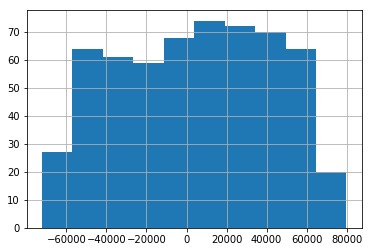

In [18]:
(merged.income - merged.ingreso_promedio).hist() 

#### Ejemplo con dos llaves
En ciertos casos, necesitamos pegar DataFrames usando varias columnas, esta situación es trivial usando pd.merge.

Veamos un caso nuevo...

In [19]:
cuentas = np.random.randint(low=100,high=200,size=10000)*17000 
opes = np.random.randint(low=100,high=200,size=10000)
df_registros = pd.DataFrame({'cuenta':cuentas,
                               'operacion':opes,
                              'moroso': np.random.binomial(1,0.05,size=10000)})
df_registros = df_registros[['cuenta',
                               'operacion',
                              'moroso']] 

In [20]:
df_registros = df_registros.sort_values(['cuenta','operacion']) # así ordenamos un dataframe en base a una columna

In [21]:
df_llaves = df_registros[['cuenta','operacion']].drop_duplicates().copy()
df_llaves = df_llaves.reset_index()

In [22]:
df_llaves.head()

,index,cuenta,operacion
0,8001,1700000,100
1,5487,1700000,101
2,2487,1700000,102
3,1194,1700000,104
4,3682,1700000,106


In [23]:
df_registros = df_registros.reset_index() 
df_registros.pop('index')
df_registros.head()

,cuenta,operacion,moroso
0,1700000,100,0
1,1700000,101,0
2,1700000,102,1
3,1700000,102,0
4,1700000,104,0


Unamos la de registros, con su llave única, ¿Como haríamos esto?...

Necesitamos unir por cuenta y operación!

In [24]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                  left_on=['cuenta','operacion'],
                  right_on=['cuenta','operacion'])
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,8001
1,1700000,101,0,5487
2,1700000,102,1,2487
3,1700000,102,0,2487
4,1700000,104,0,1194


De hecho, si los DataFrames contienen columnas con mismos nombres, el merge se hace sobre esas columnas, por lo que el código anterior se reduce a:

In [25]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                    )
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,8001
1,1700000,101,0,5487
2,1700000,102,1,2487
3,1700000,102,0,2487
4,1700000,104,0,1194


### Melt <a id ='melt'> </a>

Esta operación permite reestructurar un Dataframe a un formato que sea más sencillo de manipular ([link a documentación](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).

Generemos datos para un ejemplo:

In [26]:
data = { i:[np.random.randint(low=1,high=11)
            for j in range(7)
           ]
        for i in range(10)
       }
cols=['person {}'.format(i) for i in range(10)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['year']= range(2010,2017)
to_melt

,person 0,person 1,person 2,person 3,person 4,person 5,person 6,person 7,person 8,person 9,year
0,7,1,8,7,8,7,10,6,1,2,2010
1,1,4,4,7,10,1,9,10,3,2,2011
2,8,3,4,1,9,6,4,9,5,1,2012
3,10,1,9,2,8,6,7,5,1,1,2013
4,8,7,3,2,5,8,1,9,5,8,2014
5,1,3,8,9,9,9,5,10,9,10,2015
6,1,3,8,2,1,4,10,2,6,1,2016


In [27]:
melted = pd.melt(to_melt, id_vars=['year'], var_name='Name')
melted.head()

,year,Name,value
0,2010,person 0,7
1,2011,person 0,1
2,2012,person 0,8
3,2013,person 0,10
4,2014,person 0,8


### P:¿Qué pasó???!!!


R1:Magia.

R2: Pandas tomó todas las columnas que no estaban especificadas en el parámetros *id_vars* y los colocó en la columna **Name** (*var_name*) y por cada registro que existía en esa columna, creó un registro en el nuevo dataframe (*melted*), por lo que: 

    len(melted)=len(to_melt)x(len(to_melt.columns)-len(id_vars)).
    
A veces, tenemos que *derretir* un DataFrame basado en varias columnas, para eso tenemos el ejemplo siguiente:

**SPOILER-ALERT**: es tan sencillo como especificar las columnas en el parámetro *id_vars*

#### Ejemplo con dos columnas.

Generemos un DataFrame para el que tenga sentido hacer esta operación (por ejemplo, un dataframe con cuenta, operación y periodo mora...)

In [28]:
data = { i:[np.random.binomial(1,0.1)
            for j in range(20)
           ]
        for i in range(24)
       }
cols=['periodo mora {}'.format(i) for i in range(24)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['cuenta']= range(19,19+20)
to_melt['codigo']= np.random.randint(low=1000,high=2000,size=20)
to_melt = to_melt[list(to_melt.columns[-2:])
                  +list(to_melt.columns[:-2])
                 ]
to_melt

,cuenta,codigo,periodo mora 0,periodo mora 1,periodo mora 2,periodo mora 3,periodo mora 4,periodo mora 5,periodo mora 6,periodo mora 7,...,periodo mora 14,periodo mora 15,periodo mora 16,periodo mora 17,periodo mora 18,periodo mora 19,periodo mora 20,periodo mora 21,periodo mora 22,periodo mora 23
0,19,1770,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,1211,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,21,1447,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1166,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,1380,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,24,1586,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
6,25,1782,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,26,1215,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,27,1718,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,28,1069,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Si quisieramos trabajar este dataframe como algo vertical, deberíamos usar la funcion *melt*.

In [29]:
id_vars=['cuenta','codigo']
melted = pd.melt(to_melt,
                 id_vars=id_vars, # así de sencillo! 
                 var_name='Periodo Mora',
                 value_name='Flag mora'
                )

melted_and_sorted = melted.sort_values(['cuenta',
                                        'codigo']
                                      ) # ordenemos el DF segun cuenta y operación, para que sea más boni.
melted_and_sorted.head(24)

,cuenta,codigo,Periodo Mora,Flag mora
0,19,1770,periodo mora 0,0
20,19,1770,periodo mora 1,0
40,19,1770,periodo mora 2,0
60,19,1770,periodo mora 3,0
80,19,1770,periodo mora 4,0
100,19,1770,periodo mora 5,0
120,19,1770,periodo mora 6,0
140,19,1770,periodo mora 7,0
160,19,1770,periodo mora 8,0
180,19,1770,periodo mora 9,0


Si hubieramos olvidado agrega *'codigo'* al parámetro *id_vars* habríamos conseguido lo siguiente:

In [30]:
melted = pd.melt(to_melt, id_vars=['cuenta'], var_name='Mora')
melted_and_sorted = melted.sort_values(['cuenta'])
print(len(melted_and_sorted)) # Sobran valores!
melted_and_sorted.head(24)

500


,cuenta,Mora,value
0,19,codigo,1770
440,19,periodo mora 21,0
60,19,periodo mora 2,0
420,19,periodo mora 20,0
80,19,periodo mora 3,0
400,19,periodo mora 19,0
100,19,periodo mora 4,0
380,19,periodo mora 18,0
120,19,periodo mora 5,0
360,19,periodo mora 17,0


Ahora en la columna mora, tenemos de vez en cuando un item con el valor "codigo", el cual debería ser otra columna!

# Sanity-Check <a id='sc'><a>
Como haríamos un Sanity-Check en python¿?
Revisaremos 3 pasos:
 1. Validar DV.
 2. Botar duplicados.
 3. Contar difuntos/interdictos.

Primero hagamos un data set.

In [31]:
n = 1000000 #cantidad de registros
data = {'ID': [ ' persona {}'.format(i)
              for i in range(n)], #TIP: las *list comprehension* permiten una escritura concisa de expresiones complejas
        
        'rut': ['{}-{}'.format(i,np.random.randint(low=0,high=9))
               for i in range(17000000,17000000+n)],
        
        'difunto' : np.random.binomial(1,0.01,size=n), 
        
        'interdicto':np.random.binomial(1,0.005,size=n)
       }
DF = pd.DataFrame(data)

In [32]:
DF.head()

,ID,difunto,interdicto,rut
0,persona 0,0,0,17000000-1
1,persona 1,0,0,17000001-8
2,persona 2,0,0,17000002-7
3,persona 3,0,0,17000003-8
4,persona 4,0,0,17000004-2


In [33]:
def is_valid(rut,DV):
    ''' El primer argumento es la parte numerica del rut (float o str)
        y DV es el digito verificador en formato string
    '''
    rut_reversed = str(rut)[::-1] #revertimos los ruts
    rut_array = np.array(list(rut_reversed),dtype=int) #ahora lo guardamos en un array, como tipo numerico
    coefs = np.arange(len(rut_array))%6+2 # generamos los coeficientes correspondientes
    # print(rut_array)
    # print(coefs)
    suma = np.sum(coefs*rut_array) 
    # print(suma)
    digit =  11 -  suma%11 # calculamos el digito
    # print(digit)
    if digit == 10: # si es 10 lo reemplazamos por k
        DV_calculado = 'k'
    else:
        DV_calculado = str(digit) # si no, lo convertimos el int a str
    return DV == DV_calculado

Forma 1 (la mala (lenta))

In [34]:
DF['rut_sin_DV'] = DF.rut.apply(lambda x: int(x.split('-')[0]))
DF['DV'] = DF.rut.apply(lambda x: str(x.split('-')[1]))


la manera anterior no la usaremos porque me parece menos pythonista

Forma 2 (la no tan mala (menos lenta))


In [35]:
DF['Split'] = DF.rut.str.split('-')

In [36]:
#%%timeit
DF['is_valid'] = DF.Split.apply(lambda x: is_valid(int(x[0]),x[1]))

Veamos cuantos registros válidos tenemos... (usemos groupby?)

In [37]:
DF_valid = DF[DF.is_valid] 
DF.groupby('is_valid').size()

is_valid
False    919661
True      80339
dtype: int64

Esa cantidad exagerada se debe a que agregamos el DV de manera aleatoria, por lo que era esperable.

Veamos ahora los duplicados, para eso existe el método *.drop_duplicates()*, recordemos además que queremos botar los duplicados en el rut, independiente de las otras columnas, para eso usemos el parámetros *subset*

In [38]:
DF_not_duplicates = DF_valid.drop_duplicates(subset=['rut'])

Por la manera en que generamos los registros, que podemos esperar de de esta operación?

Por último, verifiquemos los cuantos difuntos e interdictos tenemos (para variar, groupby...)

In [39]:
DF_not_duplicates[['difunto','ID']].groupby('difunto').count()

,ID
difunto,
0,79511
1,828


In [40]:
DF_not_duplicates[['interdicto','ID']].groupby('interdicto').count()

,ID
interdicto,
0,79928
1,411


Ahora ambas clases juntas!

In [41]:
DF_not_duplicates[['difunto','interdicto','ID']].groupby(['difunto','interdicto']).count()

ID
difunto interdicto       
0       0           79109
        1             402
1       0             819
        1               9

Seleccionemos los que no están difuntos ni interdictos: (usaremos la técnica llamada *masking*)

In [42]:
DF_clean = DF_not_duplicates[(DF_not_duplicates.difunto==0) 
                             & (DF_not_duplicates.interdicto==0)]
print(len(DF_clean))

79109


Del millón de registros, sobrevivieron como 80K~, pero estamos seguros que estos son válidos.